In [27]:
import requests
import pandas as pd

# adding aircall credentials from a csv file stored in your computer
credentials = pd.read_csv('aircall api credentials.csv', index_col=0, header=0, delimiter=';', dtype=str)
credentials_dataframe = pd.DataFrame(credentials)
password = credentials_dataframe.loc['Password','Data']
username = credentials_dataframe.loc['Username','Data']

# adding the url endpoint we want to use
url = 'https://api.aircall.io/v1/calls'

# creating a bunch of lists to save iteration results
call_id = []
call_direction = []
call_date = []

# create a function to iterate over each page and return call id, direction and date
def get_data(url):
        r = requests.get(url,auth=(username,password))
        data = r.json()
        for i in data['calls']:
            call_id.append(i['id'])
            call_direction.append(i['direction'])
            call_date.append(i['started_at'])
        if data['meta'].get('next_page_link'):
            get_data(data['meta']['next_page_link'])

get_data(url)

# building a new dataframe by putting all lists together
all_calls_dataframe = pd.DataFrame({'id': call_id, 'direction': call_direction, 'date': call_date})

# generating a proper datetime field 
all_calls_dataframe['date'] = pd.to_datetime(all_calls_dataframe['date'], unit='s')

# set the resulting column as index
all_calls_dataframe_2 = all_calls_dataframe.set_index('date')

# aggregate calls by week

all_calls_dataframe_2.resample(rule='W-MON', label='left', closed='left').count()['id']

date
2019-09-30     8
2019-10-07    23
2019-10-14    18
2019-10-21    25
2019-10-28    18
2019-11-04     1
2019-11-11    15
2019-11-18     7
2019-11-25    13
2019-12-02     7
2019-12-09     7
2019-12-16     2
2019-12-23     0
2019-12-30     7
2020-01-06    26
2020-01-13    19
2020-01-20     9
2020-01-27    20
2020-02-03    14
2020-02-10    13
2020-02-17    10
2020-02-24     5
2020-03-02     4
2020-03-09    19
2020-03-16     3
2020-03-23    10
2020-03-30     4
Freq: W-MON, Name: id, dtype: int64

[]

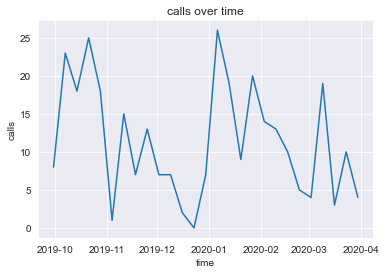

In [28]:
# creating a line chart to represent calls over time

import seaborn as sns
import matplotlib.pyplot as plt

weekly_calls = all_calls_dataframe_2.resample(rule='W-MON', label='left', closed='left').count()['id']

sns.set_style('darkgrid')

sns.lineplot(data=weekly_calls)

plt.xlabel('time')

plt.ylabel('calls')

plt.title('calls over time')

plt.plot()

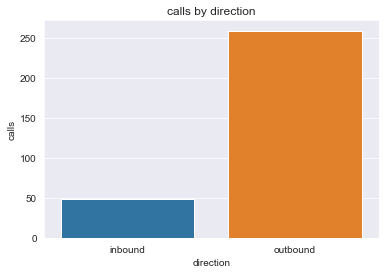

In [29]:
# creating a chart to represent total calls by direction

calls_direction = all_calls_dataframe_2.groupby('direction').count()

sns.barplot(x=calls_direction.index, y='id', data=calls_direction)

plt.xlabel('direction')

plt.ylabel('calls')

plt.title('calls by direction')

plt.show()

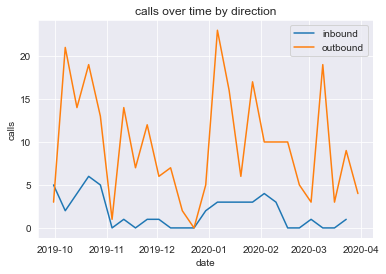

In [30]:
# how to plot multiple series in a single?

call_dimensions = all_calls_dataframe_2.groupby('direction').resample(rule='W-MON', label='left', closed='left').count().iloc[:,0]

call_dimensions = call_dimensions.rename('calls') # rename series
call_dimensions.index.get_level_values('direction') # extract direction index values
call_dimensions.index.get_level_values(level=1) # the same thing but for weeks

call_dimensions_2 = call_dimensions.unstack(level=0) # unstacking is the key method to create columns

sns.lineplot(data=call_dimensions_2, dashes=False)

plt.xlabel('date')
plt.ylabel('calls')
plt.title('calls over time by direction')

plt.plot()

plt.savefig('calls_time_direction.png') # this saves the chart as image in your computer

In [31]:
# how to export dataframe to csv file in your computer

all_calls_dataframe_2.to_csv('exported_dataframe.csv')